基于数据集选择 采用肘部法和轮廓系数法 选择合适的cluster数

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # 用于轮廓系数

In [2]:
positions_data = pd.read_feather('tt.feather').set_index('trade_time')

In [3]:
def standard_data(positions_data):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(positions_data[['value']])
    positions_data['value_scaled'] = X_scaled
    return positions_data

In [4]:
def evaluate_k_clusters(positions_data, k_range):
    inertia = []
    silhouette_scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(positions_data[['value_scaled']])
        inertia.append(kmeans.inertia_)
        if k > 1:
            silhouette_scores.append(silhouette_score(positions_data[['value_scaled']], kmeans.labels_))
    return inertia, silhouette_scores

In [5]:
positions_data = standard_data(positions_data)
positions_data.head()

,code,value,value_scaled
trade_time,,,
2024-05-29 13:23:00,IM,0.0,-0.221158
2024-05-29 13:24:00,IM,0.0,-0.221158
2024-05-29 13:25:00,IM,0.0,-0.221158
2024-05-29 13:26:00,IM,0.0,-0.221158
2024-05-29 13:27:00,IM,0.0,-0.221158


In [7]:
k_range = range(2, 15)

In [8]:
inertia, silhouette_scores = evaluate_k_clusters(positions_data, k_range)

In [11]:
import matplotlib.pyplot as plt

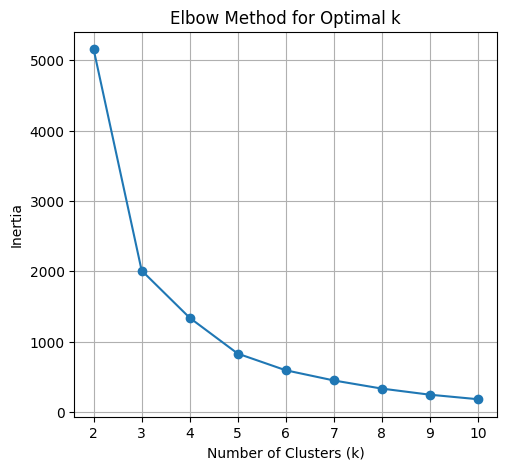

In [13]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)


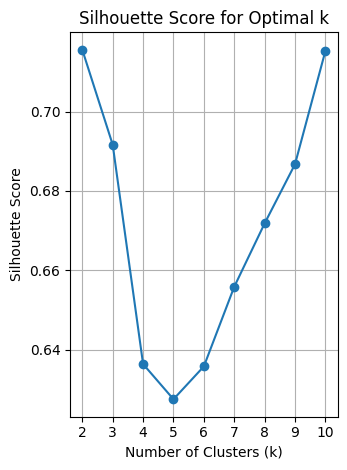

In [18]:
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()